First 5 records:


,Customer_ID,Gender,Age,Product_Category,Purchase_Amount,Purchase_Frequency
0,1,Male,34,Clothing,18484,18
1,2,Female,26,Electronics,19194,15
2,3,Male,50,Clothing,23484,19
3,4,Male,37,Furniture,18033,13
4,5,Male,30,Furniture,25322,19



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         1000 non-null   int64 
 1   Gender              1000 non-null   object
 2   Age                 1000 non-null   int64 
 3   Product_Category    1000 non-null   object
 4   Purchase_Amount     1000 non-null   int64 
 5   Purchase_Frequency  1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


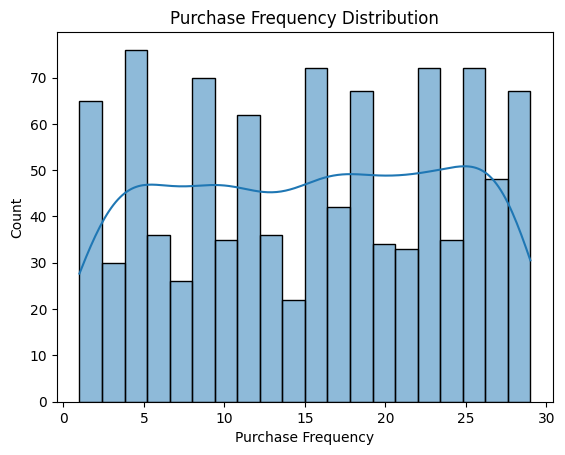

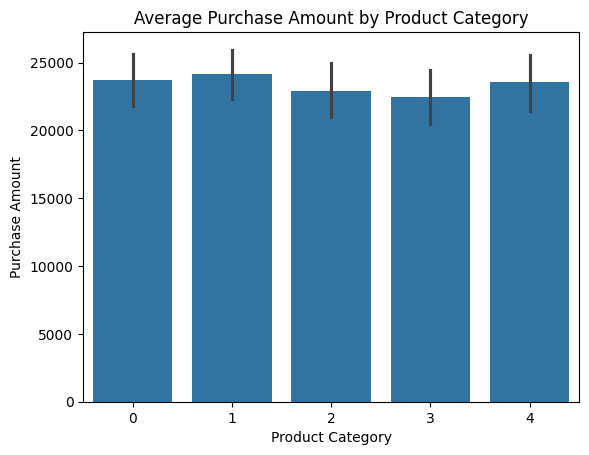

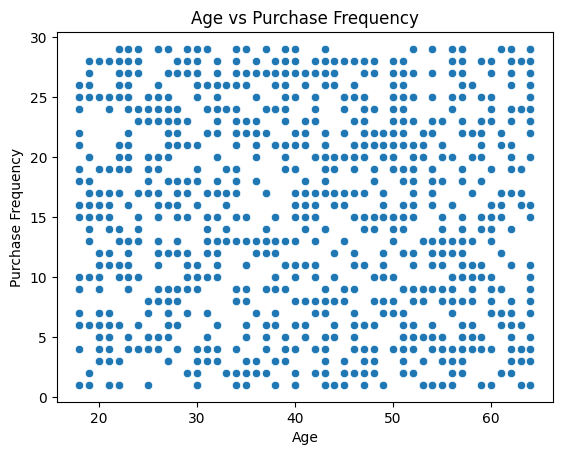

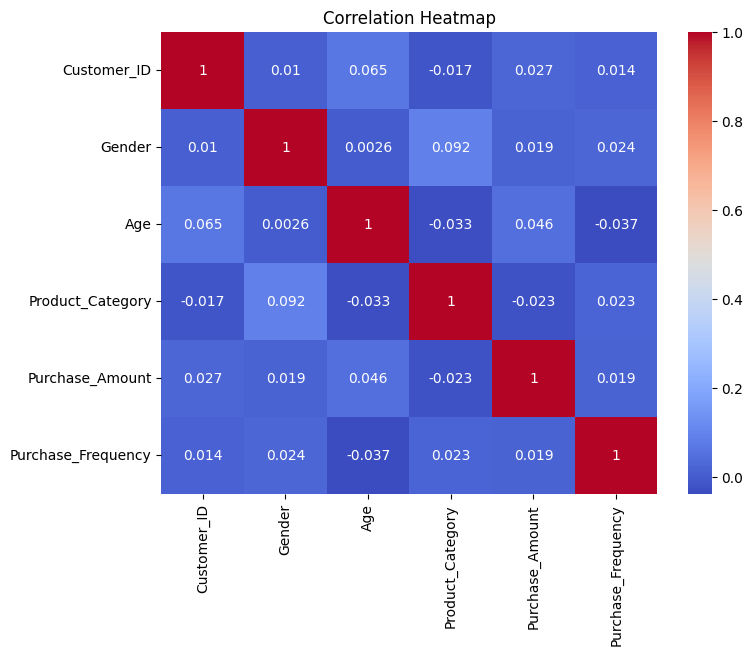

In [2]:
# -*- coding: utf-8 -*-
"""Customer_Purchase_Frequency_Analysis.ipynb"""

# ---------------------------------
# Import required libraries
# ---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------------
# Dataset Creation (1000 Records)
# ---------------------------------
np.random.seed(42)

data = {
    "Customer_ID": np.arange(1, 1001),
    "Gender": np.random.choice(["Male", "Female"], 1000),
    "Age": np.random.randint(18, 65, 1000),
    "Product_Category": np.random.choice(
        ["Electronics", "Clothing", "Grocery", "Furniture", "Beauty"], 1000
    ),
    "Purchase_Amount": np.random.randint(200, 50000, 1000),
    "Purchase_Frequency": np.random.randint(1, 30, 1000)
}

df = pd.DataFrame(data)

# ---------------------------------
# Dataset Preview
# ---------------------------------
print("First 5 records:")
display(df.head())

print("\nDataset Info:")
df.info()

# ---------------------------------
# Data Cleaning
# ---------------------------------
df.drop_duplicates(inplace=True)

# ---------------------------------
# Encode Categorical Columns
# ---------------------------------
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Product_Category"] = le.fit_transform(df["Product_Category"])

# ---------------------------------
# Exploratory Data Analysis (EDA)
# ---------------------------------

# Purchase Frequency Distribution
plt.figure()
sns.histplot(df["Purchase_Frequency"], bins=20, kde=True)
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.show()

# Average Purchase Amount by Product Category
plt.figure()
sns.barplot(x=df["Product_Category"], y=df["Purchase_Amount"])
plt.title("Average Purchase Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Purchase Amount")
plt.show()

# Age vs Purchase Frequency
plt.figure()
sns.scatterplot(x=df["Age"], y=df["Purchase_Frequency"])
plt.title("Age vs Purchase Frequency")
plt.xlabel("Age")
plt.ylabel("Purchase Frequency")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------
# Feature Selection
# ---------------------------------
X = df[["Age", "Purchase_Amount"]]
y = df["Purchase_Frequency"]

# ---------------------------------
# Feature Scaling
# ---------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------
# Train-Test Split
# -----------------------------
